In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


Pandas (pd) → Handles data manipulation
NumPy (np) → Supports numerical operations
Matplotlib (plt) → Used for plotting graphs
Seaborn (sns) → Advanced data visualization
Scikit-learn (sklearn) → Machine learning tools (splitting, scaling, encoding)

In [47]:
# Load dataset
df = pd.read_csv("C:/Users/amama/Downloads/Fertilizer Prediction.csv")

✔ Reads the CSV file into a Pandas DataFrame
✔ Removes duplicate rows
✔ Fixes any extra spaces in column names to prevent errors

In [14]:
# Remove duplicates
df = df.drop_duplicates()

In [15]:
print(df.columns)

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [21]:
# Strip column names (to remove any extra spaces)
df.columns = df.columns.str.strip()

In [32]:
# Display dataset summary
print("\nDataset Summary:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Temparature      99 non-null     int64
 1   Humidity         99 non-null     int64
 2   Moisture         99 non-null     int64
 3   Soil Type        99 non-null     int32
 4   Crop Type        99 non-null     int32
 5   Nitrogen         99 non-null     int64
 6   Potassium        99 non-null     int64
 7   Phosphorous      99 non-null     int64
 8   Fertilizer Name  99 non-null     int64
dtypes: int32(2), int64(7)
memory usage: 6.3 KB
None

First 5 Rows:
   Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  Potassium  \
0           26        52        38          4          3        37          0   
1           29        52        45          2          8        12          0   
2           34        65        62          0          1         7          9   
3   

In [34]:
# Handle missing values (if any)
print("\nMissing Values Before Handling:")
print(df.isnull().sum())  # Check for missing values
df = df.dropna()  # Remove missing values (or use df.fillna(method='ffill') to fill)


Missing Values Before Handling:
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


df.isnull().sum() → Checks if any column has missing values
df = df.dropna() → If there are missing values, drop those rows

In [35]:
# Display the number of rows and columns
print("\nDataset Shape (Rows, Columns):", df.shape)


Dataset Shape (Rows, Columns): (99, 9)


In [ ]:
df.shape → Displays total number of rows and columns

In [22]:
# Encode target variable (label encoding for categorical target)
le = LabelEncoder()
df['Fertilizer Name'] = le.fit_transform(df['Fertilizer Name'])

In [48]:
# Encode target variable (Fertilizer Name)
le_target = LabelEncoder()
df['Fertilizer Name'] = le_target.fit_transform(df['Fertilizer Name'])

Label Encoding: Converts text labels (Fertilizer Name) into numbers

Example:
['Urea', 'DAP', 'NPK'] → [0, 1, 2]

In [37]:

# Identify categorical and numerical columns
categorical_cols = ['Soil Type', 'Crop Type']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['Fertilizer Name']]

Defines which columns are categorical and which are numerical

In [38]:
# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  

Converts categorical columns (Soil Type, Crop Type) into numerical values

Example:
['Sandy', 'Clay', 'Loam'] → [0, 1, 2]
# can also use OneHotEncoder

In [25]:
# Split data into features and target
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

80% Training, 20% Testing
random_state=42 ensures reproducibility
stratify=y ensures balanced classes in train/test split

X = All features (independent variables)
y = Target variable (Fertilizer Name)

In [39]:
print("\nPreprocessing complete. Data is ready for model training.")


Preprocessing complete. Data is ready for model training.


In [27]:
# Standardize numerical features only
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

StandardScaler() scales numerical columns to standard normal distribution (mean=0, variance=1)

Prevents features with large values (e.g., Nitrogen = 200) from dominating smaller ones (e.g., Temperature = 30)

In [28]:
print(df.head(10))  # Shows the first 10 rows


   Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  Potassium  \
0           26        52        38          4          3        37          0   
1           29        52        45          2          8        12          0   
2           34        65        62          0          1         7          9   
3           32        62        34          3          9        22          0   
4           28        54        46          1          6        35          0   
5           26        52        35          4          0        12         10   
6           25        50        64          3          1         9          0   
7           33        64        50          2         10        41          0   
8           30        60        42          4          4        21          0   
9           29        58        33          0          5         9          7   

   Phosphorous  Fertilizer Name  
0            0                6  
1           36                5  
2     

In [30]:
print("Total number of rows:", df.shape[0])


Total number of rows: 99


<Figure size 1200x800 with 0 Axes>

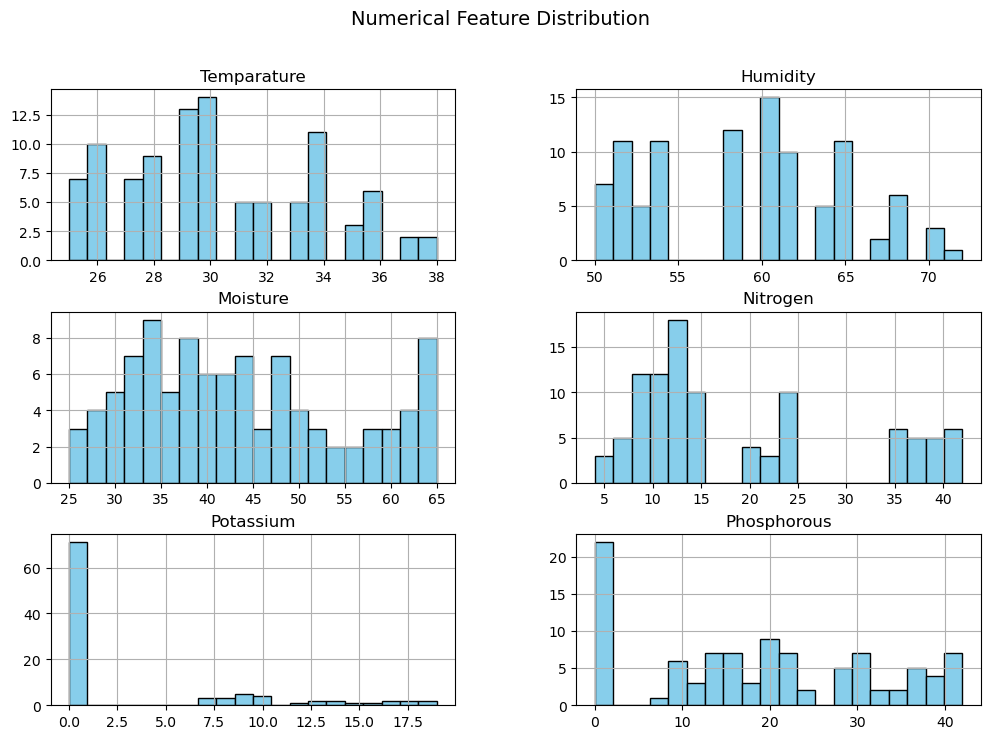

In [40]:
#  **Distribution of numerical features**
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Numerical Feature Distribution", fontsize=14)
plt.show()

Histogram shows how values are distributed across numerical features

<Figure size 1200x600 with 0 Axes>

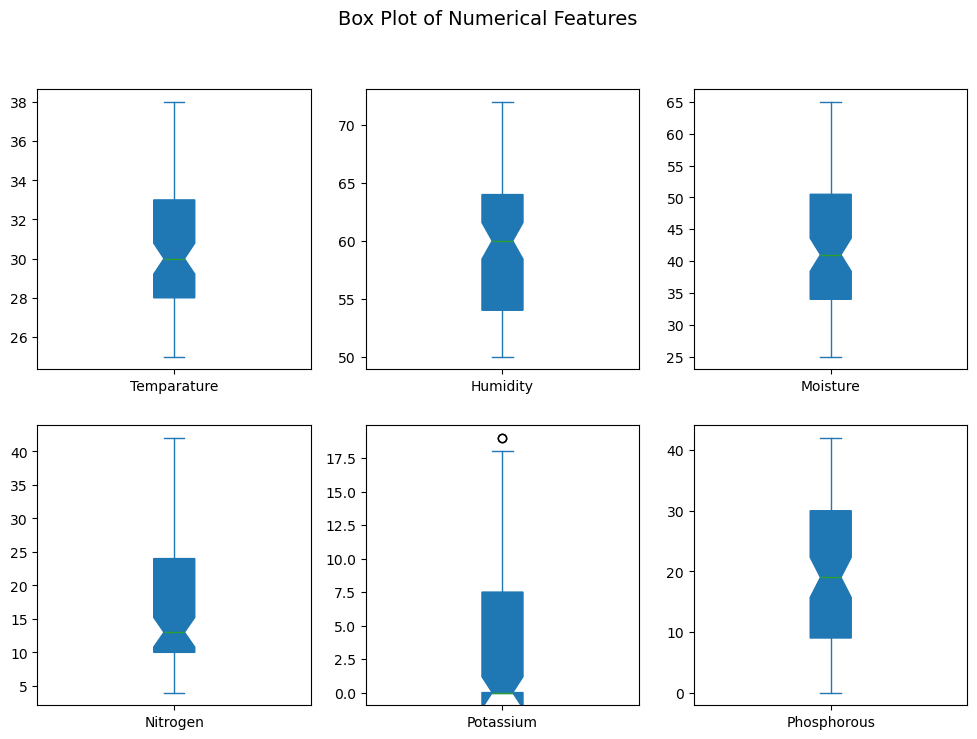

In [41]:
#  **Box plot to check for outliers**
plt.figure(figsize=(12, 6))
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), notch=True, patch_artist=True)
plt.suptitle("Box Plot of Numerical Features", fontsize=14)
plt.show()

Box plot helps identify outliers in numerical features

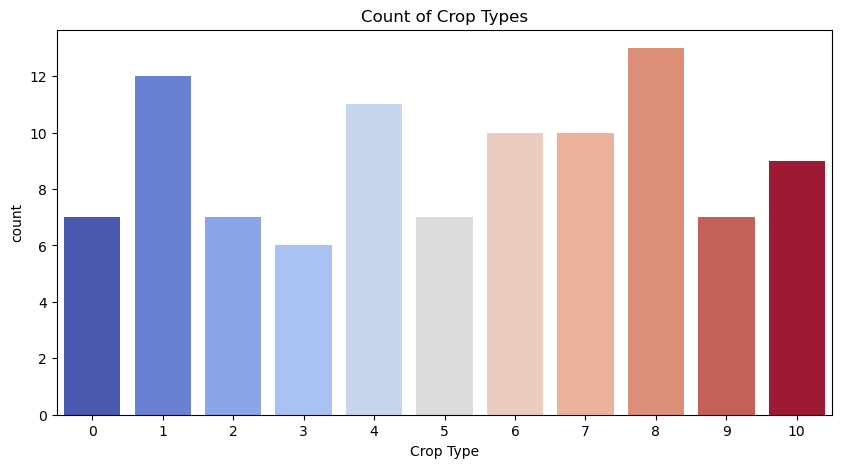

In [45]:
# Count plot for Crop Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Crop Type', hue='Crop Type', data=df, palette='coolwarm', legend=False)
plt.title("Count of Crop Types")
plt.show()


Count Plot shows how many times each Crop Type appears

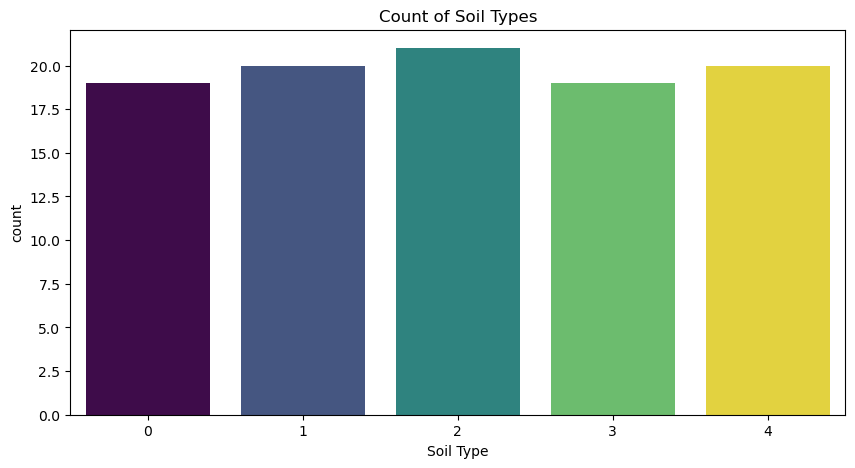

In [46]:
# Count plot for Soil Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Soil Type', hue='Soil Type', data=df, palette='viridis', legend=False)
plt.title("Count of Soil Types")
plt.show()

Count Plot for Soil Type

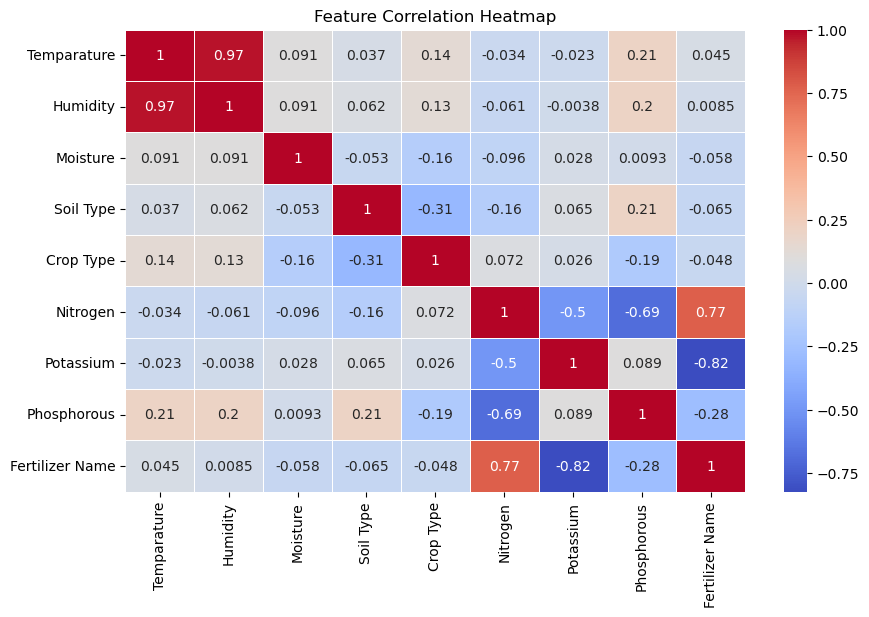

In [44]:
# 4️⃣ **Correlation Heatmap**
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Heatmap shows how strongly each feature is correlated with others

Example:
A high correlation between Nitrogen and Fertilizer Name means Nitrogen strongly affects fertilizer choice

Load & clean the dataset
Check dataset info & missing valuesEncode categorical features (Soil Type, Crop Type, Fertilizer Name)
Split data into train/test
Standardize numerical features
Visualize data with:
    Histograms (distribution)
    Box plots (outliers)
    Count plots (categorical feature distribution)
    Heatmaps (feature correlation)


The code preprocesses a fertilizer recommendation dataset
It cleans, encodes, splits, and scales data for machine learning
It visualizes data for better insights
The final dataset is now ready for model training